# Step 1

In [ ]:
import pandas as pd

data = pd.read_csv("malaria.csv")

# Menampilkan beberapa baris pertama untuk melihat struktur data
print("Data Preview:")
print(data.head())

# Memisahkan fitur dan target
# Target (dependent variable) adalah 'activity'
y = data['activity']

# Fitur (independent variables) adalah semua kolom selain 'activity'
X = data.drop(columns=['activity'])

# Menampilkan hasil pemisahan
print("\nVariable Terikat (activity):")
print(y.head())

print("\nVariable Bebas (Fitur):")
print(X.head())


# Step 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Memuat dataset
data = pd.read_csv("malaria.csv")

# Menampilkan beberapa baris pertama untuk memahami struktur data
print("Data Preview:")
print(data.head())

# 1. Analisis Deskriptif
print("\nAnalisis Deskriptif:")
print(data.describe())

# 2. Memeriksa skewness dan kurtosis untuk setiap fitur
skewness = data.skew()
kurt = data.kurt()

print("\nSkewness untuk setiap kolom:")
print(skewness)

print("\nKurtosis untuk setiap kolom:")
print(kurt)

# 3. Visualisasi distribusi fitur numerik
numerical_cols = data.select_dtypes(include=[np.number]).columns

# Visualisasi histogram untuk setiap fitur numerik
# for col in numerical_cols:
#     plt.figure(figsize=(8, 5))
#     sns.histplot(data[col], kde=True)
#     plt.title(f'Distribusi {col}')
#     plt.show()

# 4. Visualisasi boxplot untuk deteksi outliers
# for col in numerical_cols:
#     plt.figure(figsize=(8, 5))
#     sns.boxplot(x=data[col])
#     plt.title(f'Boxplot untuk {col}')
#     plt.show()

# 5. Korelasi antara fitur dan target ('activity')
# Menggunakan korelasi Pearson antara fitur numerik dan target
data['activity'] = data['activity'].map({'Positive': 1, 'Negative': 0})  # Mengubah 'activity' menjadi angka
correlation = data.corr()

# Menampilkan korelasi antara semua fitur dan target
print("\nKorelasi antara fitur dan target:")
print(correlation['activity'])

# 6. Visualisasi heatmap korelasi antara fitur-fitur
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
# plt.title('Korelasi antara fitur-fitur')
# plt.show()

# 7. Visualisasi hubungan antara fitur bebas dan target
# Visualisasi hubungan antara fitur dan target untuk beberapa fitur
# sns.pairplot(data, hue='activity', diag_kind='kde', markers=["o", "s"])
# plt.show()


# Step 3

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat dataset
data = pd.read_csv("malaria.csv")

# Menampilkan beberapa baris pertama untuk melihat data
print("Data Preview:")
print(data.head())

# 1. Mengatasi Missing Values
# Periksa missing values dalam dataset
print("\nJumlah Missing Values per Kolom:")
print(data.isnull().sum())

# Menggunakan SimpleImputer untuk mengisi missing values dengan mean untuk kolom numerik
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data.select_dtypes(include=[np.number])), columns=data.select_dtypes(include=[np.number]).columns)

# Mengisi missing values pada data kategorikal dengan modus
categorical_cols = data.select_dtypes(include=[object]).columns
for col in categorical_cols:
    data_imputed[col] = data[col].fillna(data[col].mode()[0])

# 2. Encoding Categorical Variables
# Label Encoding pada kolom 'activity' (karena ini adalah kolom target)
le = LabelEncoder()
data_imputed['activity'] = le.fit_transform(data_imputed['activity'])

# 3. Feature Scaling
# Normalisasi fitur numerik menggunakan StandardScaler
scaler = StandardScaler()
numerical_cols = data_imputed.select_dtypes(include=[np.number]).columns
data_imputed[numerical_cols] = scaler.fit_transform(data_imputed[numerical_cols])

# 4. Outlier Detection
# Menggunakan Boxplot untuk mendeteksi outliers
# for col in numerical_cols:
#     plt.figure(figsize=(8, 5))
#     sns.boxplot(x=data_imputed[col])
#     plt.title(f'Boxplot untuk {col}')
#     plt.show()

# 5. Memisahkan Fitur dan Target
X = data_imputed.drop(columns=['activity'])  # Semua kolom selain 'activity' adalah fitur bebas
y = data_imputed['activity']  # 'activity' adalah target

# 6. Pembagian Data Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan beberapa baris data yang sudah diproses
print("\nData setelah Preprocessing (beberapa baris pertama):")
print(data_imputed.head())


Data Preview:
   Unnamed: 0        X1        X2        X3        X4        X5        X6  \
0           0  0.076360 -0.017963 -0.041079  0.032744  0.026876 -0.013251   
1           1  0.087906 -0.021278 -0.055732  0.043131  0.041534 -0.010785   
2           2  0.083905 -0.027958 -0.058104  0.052989  0.043250 -0.014711   
3           3  0.078050 -0.031266 -0.052941  0.034495  0.029298 -0.007183   
4           4  0.092521 -0.035803 -0.067008  0.047054  0.038388 -0.008419   

         X7        X8        X9  ...      X120      X121      X122      X123  \
0  0.012844 -0.015637  0.013579  ... -0.002356 -0.024190 -0.026568  0.048401   
1  0.017838 -0.020033  0.017920  ...  0.008207 -0.027432 -0.025528  0.062203   
2  0.019079 -0.026991  0.019388  ...  0.009689 -0.031705 -0.035554  0.046045   
3  0.018254 -0.026949  0.015953  ...  0.000058 -0.022599 -0.030457  0.042340   
4  0.021455 -0.032326  0.028549  ...  0.003027 -0.038423 -0.038319  0.058349   

       X124      X125      X126      X127 

# Step 4&5

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Memuat dataset yang telah diproses
data = pd.read_csv("malaria.csv")

# Preprocessing Data
# Menangani missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data.select_dtypes(include=[np.number])), columns=data.select_dtypes(include=[np.number]).columns)

# Mengisi missing values untuk kolom kategorikal dengan modus
categorical_cols = data.select_dtypes(include=[object]).columns
for col in categorical_cols:
    data_imputed[col] = data[col].fillna(data[col].mode()[0])

# Encoding kolom 'activity'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_imputed['activity'] = le.fit_transform(data_imputed['activity'])

# Feature Scaling menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = data_imputed.select_dtypes(include=[np.number]).columns
data_imputed[numerical_cols] = scaler.fit_transform(data_imputed[numerical_cols])

# Memisahkan fitur dan target
X = data_imputed.drop(columns=['activity'])  # Semua kolom selain 'activity' adalah fitur bebas
y = data_imputed['activity']  # 'activity' adalah target

# Pembagian data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Membangun model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi dengan test-set
y_pred = model.predict(X_test)

# Menampilkan hasil prediksi dengan nilai sebenarnya
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print("\nHasil Prediksi dan Nilai Sebenarnya:")
print(results.head())

# Evaluasi Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nMean Squared Error: {mse}')
print(f'R²: {r2}')



Hasil Prediksi dan Nilai Sebenarnya:
        Actual  Predicted
5344  0.121193  -0.139446
7444  1.526054  -0.085150
1731 -0.330014  -0.208287
8719  0.139547   0.243182
4521  1.118438   0.134099

Mean Squared Error: 0.994215402517127
R²: -0.009640142357093096


# Step 6

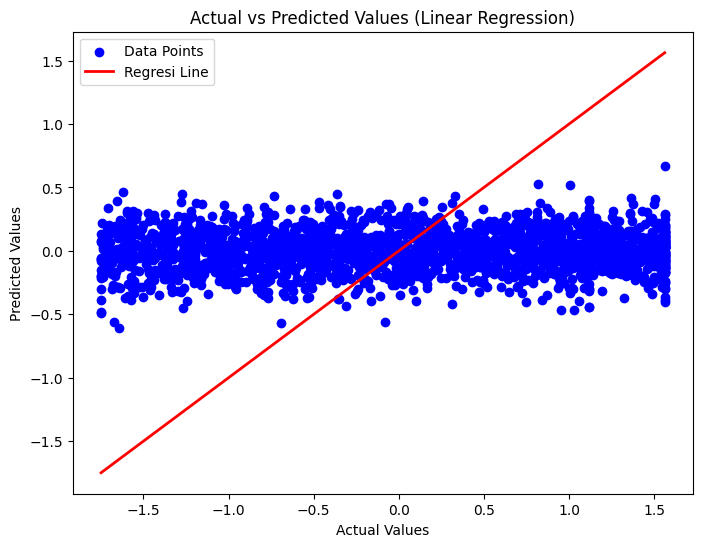


Evaluation Metrics:
Mean Squared Error (MSE): 0.9844510815981801
Root Mean Squared Error (RMSE): 0.9921950824299525
Mean Absolute Error (MAE): 0.8550488324989858
R² (Coefficient of Determination): -0.010875615736476885


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Memuat dataset yang telah diproses
data = pd.read_csv("malaria.csv")

# Preprocessing Data
# Menangani missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data.select_dtypes(include=[np.number])), columns=data.select_dtypes(include=[np.number]).columns)

# Mengisi missing values untuk kolom kategorikal dengan modus
categorical_cols = data.select_dtypes(include=[object]).columns
for col in categorical_cols:
    data_imputed[col] = data[col].fillna(data[col].mode()[0])

# Encoding kolom 'activity'
le = LabelEncoder()
data_imputed['activity'] = le.fit_transform(data_imputed['activity'])

# Feature Scaling menggunakan StandardScaler
scaler = StandardScaler()
numerical_cols = data_imputed.select_dtypes(include=[np.number]).columns
data_imputed[numerical_cols] = scaler.fit_transform(data_imputed[numerical_cols])

# Memisahkan fitur dan target
X = data_imputed.drop(columns=['activity'])  # Semua kolom selain 'activity' adalah fitur bebas
y = data_imputed['activity']  # 'activity' adalah target

# Pembagian data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi dengan test-set
y_pred = model.predict(X_test)

# 1. Menampilkan Regresi Model (Visualisasi)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Data Points')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label="Regresi Line")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.legend()
plt.show()

# 2. Evaluasi Model menggunakan berbagai metrics
# Menghitung MSE, RMSE, MAE, dan R²
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² (Coefficient of Determination): {r2}")



# Step 7

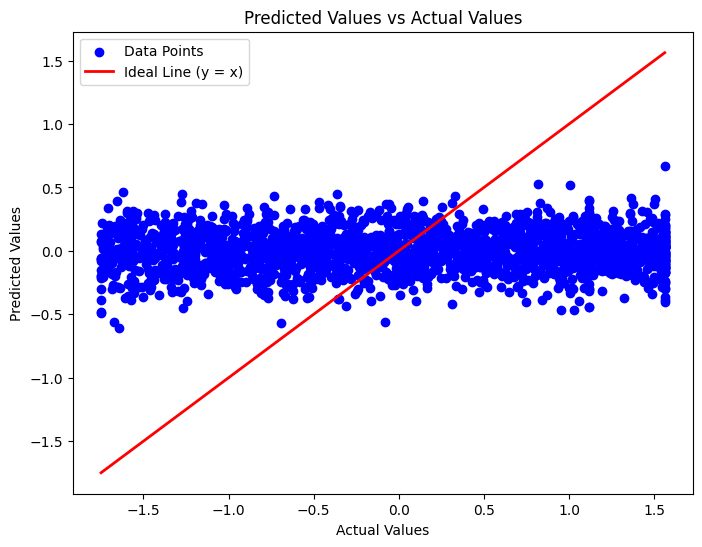

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Memuat dataset yang telah diproses
data = pd.read_csv("malaria.csv")

# Preprocessing Data
# Menangani missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data.select_dtypes(include=[np.number])), columns=data.select_dtypes(include=[np.number]).columns)

# Mengisi missing values untuk kolom kategorikal dengan modus
categorical_cols = data.select_dtypes(include=[object]).columns
for col in categorical_cols:
    data_imputed[col] = data[col].fillna(data[col].mode()[0])

# Encoding kolom 'activity'
le = LabelEncoder()
data_imputed['activity'] = le.fit_transform(data_imputed['activity'])

# Feature Scaling menggunakan StandardScaler
scaler = StandardScaler()
numerical_cols = data_imputed.select_dtypes(include=[np.number]).columns
data_imputed[numerical_cols] = scaler.fit_transform(data_imputed[numerical_cols])

# Memisahkan fitur dan target
X = data_imputed.drop(columns=['activity'])  # Semua kolom selain 'activity' adalah fitur bebas
y = data_imputed['activity']  # 'activity' adalah target

# Pembagian data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi dengan test-set
y_pred = model.predict(X_test)

# 1. Membuat Scatter Plot Predicted vs Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Data Points')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label="Ideal Line (y = x)")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Values vs Actual Values')
plt.legend()
plt.show()
